## MLP多層感知器 ##
* 以Mnist資料集進行程式碼練習, 辦認0~9的數字
* 模型訓練及驗證

In [1]:
from keras.datasets import mnist #下載資料集
from sklearn.preprocessing import MinMaxScaler #feature正規化
from keras.utils import np_utils #Label處理one-hot-encoding
from keras.models import Sequential #建立Sequential序貫模型
from keras.layers import Dense #建立層
import matplotlib.pyplot as plt #畫出來

Using TensorFlow backend.


In [2]:
#下載資料集 .load_data()
#from keras.datasets import mnist
(train_feature, train_label),(test_feature,test_label) = mnist.load_data()

In [3]:
#確認資料數量及維度
print(train_feature.shape, train_label.shape)
print(test_feature.shape, test_label.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [4]:
#維度處理 reshape()
#將28*28，轉換為784的一維向量；float
train_feature_vector = train_feature.reshape(len(train_feature),784).astype('float32')
test_feature_vector = test_feature.reshape(len(test_feature),784).astype('float32')

In [5]:
#看看train資料變成什麼樣子
print('訓練資料shape：',train_feature_vector.shape)
print('測試資料shape：',test_feature_vector.shape)

訓練資料shape： (60000, 784)
測試資料shape： (10000, 784)


In [6]:
#feature處理_正規化
#from sklearn.preprocessing import MinMaxScaler

In [7]:
scaler = MinMaxScaler(feature_range=(0, 1))
train_feature_normalize = scaler.fit_transform(train_feature_vector)
test_feature_normalize = scaler.fit_transform(test_feature_vector)

In [8]:
train_feature_normalize[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [9]:
#Label處理_one-hot-encoding
#from keras.utils import np_utils

In [10]:
train_label_onehot = np_utils.to_categorical(train_label)
test_label_onehot = np_utils.to_categorical(test_label)

In [11]:
train_label_onehot[0:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [12]:
#建立模型 Sequential()
#from keras.models import Sequential
model = Sequential()

In [13]:
#建立輸入與隱藏層 add()
#輸出設256
#輸入是784
#kernel_initializer權重初始化，設normal
#activation，選用ReLU
##ReLU，忽略負數，值在0~無限大之間；計算速度較快、收斂速度快
##Sigmoid，值在0~1之間，分布兩極化，大部分不是 0就是 1，適合二分法；反向更新權重時，容易梯度消失，以及收斂曲線不平滑
##tanh，值在-1~1之間，傳導有負值，是zero-centered，但仍容易梯度消失
##softmax，值在0~1之間，機率總和等於 1；適合多分類使用

#from keras.layers import Dense
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))

In [14]:
#建立輸出層 add()
#輸出是10
#activation，選用softmax；值在0~1之間，機率總和等於 1；適合多分類使用
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

In [15]:
#設定模型訓練方式 compile()
#loss選用categorical_crossentropy；當預測值與實際值愈相近，損失函數就愈小，反之差距很大，會更影響損失函數的值
#optimizer優化器(偏微分逐步按著下降的方向)選用
#metrics衡量指標 準確度
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
#進行訓練 fit()
train_history = model.fit(x=train_feature_normalize, y=train_label_onehot, 
                          validation_split=0.2, epochs=8, batch_size=100, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/8
 - 2s - loss: 0.3561 - accuracy: 0.9032 - val_loss: 0.1842 - val_accuracy: 0.9494
Epoch 2/8
 - 2s - loss: 0.1532 - accuracy: 0.9553 - val_loss: 0.1309 - val_accuracy: 0.9608
Epoch 3/8
 - 2s - loss: 0.1052 - accuracy: 0.9703 - val_loss: 0.1104 - val_accuracy: 0.9670
Epoch 4/8
 - 2s - loss: 0.0763 - accuracy: 0.9782 - val_loss: 0.0971 - val_accuracy: 0.9710
Epoch 5/8
 - 2s - loss: 0.0587 - accuracy: 0.9831 - val_loss: 0.0877 - val_accuracy: 0.9728
Epoch 6/8
 - 2s - loss: 0.0458 - accuracy: 0.9870 - val_loss: 0.0906 - val_accuracy: 0.9724
Epoch 7/8
 - 2s - loss: 0.0352 - accuracy: 0.9905 - val_loss: 0.0831 - val_accuracy: 0.9762
Epoch 8/8
 - 2s - loss: 0.0284 - accuracy: 0.9924 - val_loss: 0.0890 - val_accuracy: 0.9731


In [17]:
#進行預測 predict_classes()
prediction = model.predict_classes(test_feature_normalize)

In [18]:
# 自定呈現方式
import matplotlib.pyplot as plt
def show_image_labels_predictions(images, lables, predictions, start_id, num=10):
    plt.gcf().set_size_inches(12, 14)
    if num>25: num=25
    for i in range(0, num):
        ax = plt.subplot(5,5, 1+i)
        ax.imshow(images[start_id], cmap='binary')

        if len(predictions)>0:
            title = 'pred = '+ str(predictions[start_id])
            title += ('(O)' if predictions[start_id]==lables[start_id] else '(X)')
            title += '\nlabel = '+ str(lables[start_id])
        else:
            title = 'label = '+ str(lables[start_id])

        ax.set_title(title, fontsize = 12)
        ax.set_xticks([])
        ax.set_yticks([])
        start_id += 1
    plt.show()

In [19]:
#評估準確率 evaluate()
scores = model.evaluate(test_feature_normalize, test_label_onehot)
print('準確率:', scores[1])

10000/10000 [==============================] - 0s 33us/step
準確率: 0.9739999771118164


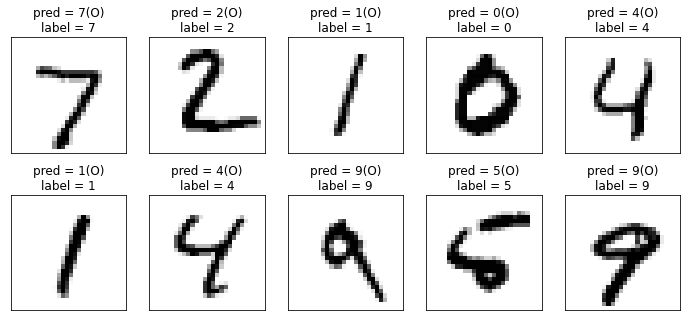

In [20]:
#將圖片與預測資料同時呈現
show_image_labels_predictions(test_feature, test_label, prediction, 0)

In [21]:
#儲存模型
model.save('Mnist_MLPmodel.h5')
print("saved:'Mnist_MLPmodel.h5'")
del model

saved:'Mnist_MLPmodel.h5'
